# Dataset exploration

In [1]:
#imports
import sys
sys.path.append('/home/elenaruiz/Documents/FNC')
import pandas as pd
import numpy as np
from src.utils import io
from src.fake_news_detector.core.nlp import clean_text as ct

### Import classified content dataset

In [2]:
articles = io.read_json_file('/home/elenaruiz/Documents/FNC/src/data/dataset_content.json')
df = pd.DataFrame(data=articles['articles'])

## Exploration

El dataset original contiene los siguientes datos:
- Fake: True si es fake, False si es real.
- Subtitle: Texto plano del subtitulo
- Text: El cuerpo del articulo, divido en una lista de string por párrafos
- Title: Texto plano del titulo
- URL: URl de la fuente.

In [3]:
dataset = pd.DataFrame()
dataset['text'] = df['all_word']
dataset['label'] = df['fake']*1
dataset.head()

,text,label
0,"[find, corpse, vegetarian, restaurant, Bangkok...",1
1,"[switzerland, warn, authorize, extradition, po...",1
2,"[navarre, censor, Songs, Amaral, Shakira, song...",1
3,"[woman, pretend, blind, years, greet, people, ...",1
4,"[arrested, ejaculate, boss, coffee, last, four...",1


In [4]:
len(dataset)

137

Split by class

In [41]:
df_fake = df.loc[df['fake'] == 1]
df_real = df.loc[df['fake'] == 0]

print('FAKE NEWS:', len(df_fake), ' ', len(df_fake)*100/len(df), '%')
print('REAL NEWS:', len(df_real), ' ', len(df_real)*100/len(df), '%')

# JACCARD SIMILARITY
jacc_sim = {}

FAKE NEWS: 70   51.09489051094891 %
REAL NEWS: 67   48.90510948905109 %


In [42]:
from src.fake_news_detector.core.data_process import word_frequency as wf

## Title exploration
### Word frequency

In [43]:
print('All text')
freqDist_one = wf.get_word_freq(df['title_word'], True, topn=10)

print('Real news')
freqDist_two = wf.get_word_freq(df_real['title_word'], True, topn=10)

print('Fake news')
freqDist_three = wf.get_word_freq(df_fake['title_word'], True, topn=10)

All text
Number of unique words:  790
Top 10 words:
[('Spain', 12), ('new', 6), ('Spanish', 6), ('government', 5), ('man', 5), ('years', 4), ('ban', 4), ('ask', 4), ('police', 4), ('refuse', 4)]
Real news
Number of unique words:  403
Top 10 words:
[('Spain', 5), ('first', 4), ('new', 3), ('agreement', 3), ('government', 3), ('approve', 3), ('want', 2), ('confirm', 2), ('Abascal', 2), ('two', 2)]
Fake news
Number of unique words:  445
Top 10 words:
[('Spain', 7), ('ban', 4), ('Spanish', 4), ('man', 4), ('woman', 3), ('years', 3), ('new', 3), ('demand', 3), ('children', 3), ('refuse', 3)]


In [44]:
print('Simple similarity: ')

topn = int(len(freqDist_one) * 0.3)
res = wf.pert_of_difference(freqDist_two, freqDist_three, topn)
jacc_sim['title'] = res
res

Simple similarity: 


0.046357615894039736

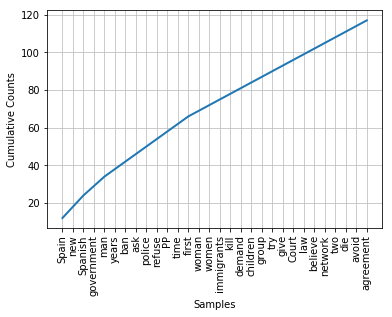

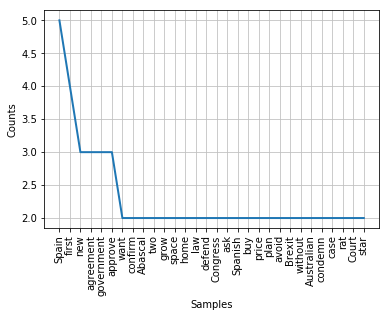

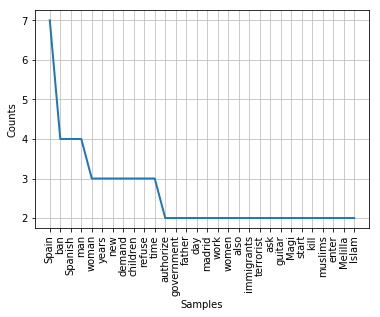

In [45]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Text exploration
### Word frequency

In [46]:
print('All text')
freqDist_one = wf.get_word_freq(df['all_word'], True, topn=10)

print('Real news')

freqDist_two = wf.get_word_freq(df_real['all_word'], True, topn=10)

print('Fake news')
freqDist_three = wf.get_word_freq(df_fake['all_word'], True, topn=10)

All text
Number of unique words:  7289
Top 10 words:
[('say', 156), ('also', 125), ('Spain', 105), ('time', 91), ('years', 90), ('new', 89), ('make', 86), ('Spanish', 85), ('would', 83), ('take', 83)]
Real news
Number of unique words:  5020
Top 10 words:
[('say', 94), ('also', 78), ('first', 61), ('make', 57), ('would', 52), ('new', 52), ('Spain', 52), ('year', 50), ('years', 49), ('time', 47)]
Fake news
Number of unique words:  4290
Top 10 words:
[('say', 62), ('Spain', 53), ('Spanish', 53), ('also', 47), ('time', 44), ('police', 43), ('use', 42), ('years', 41), ('de', 41), ('go', 41)]


In [47]:
print('Simple similarity: ')

topn = int(len(freqDist_one) * 0.3)
res = wf.pert_of_difference(freqDist_two, freqDist_three, topn)
jacc_sim['text'] = res
res

Simple similarity: 


0.32004830917874394

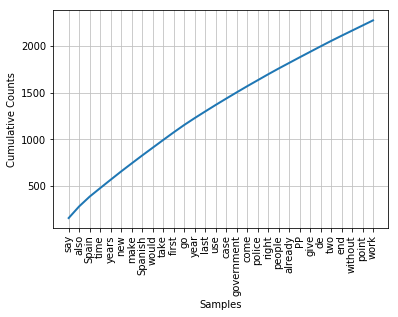

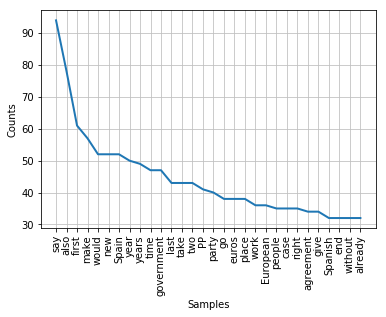

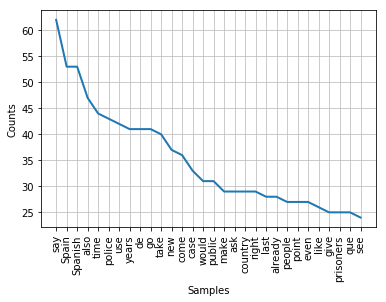

In [48]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Positive words exploration
### Word frequency

In [49]:

print('All text')
freqDist_one = wf.get_word_freq(df['positive_words'], True, topn=10)

print('Real news')

freqDist_two = wf.get_word_freq(df_real['positive_words'], True, topn=10)

print('Fake news')
freqDist_three = wf.get_word_freq(df_fake['positive_words'], True, topn=10)

All text
Number of unique words:  376
Top 10 words:
[('like', 50), ('agreement', 39), ('United', 30), ('increase', 30), ('support', 26), ('allow', 26), ('security', 25), ('hand', 24), ('create', 22), ('free', 22)]
Real news
Number of unique words:  279
Top 10 words:
[('agreement', 34), ('like', 24), ('United', 21), ('great', 15), ('increase', 15), ('best', 14), ('respect', 13), ('allow', 13), ('support', 13), ('share', 13)]
Fake news
Number of unique words:  232
Top 10 words:
[('like', 26), ('security', 17), ('hand', 16), ('create', 15), ('free', 15), ('increase', 15), ('support', 13), ('freedom', 13), ('allow', 13), ('ha', 10)]


In [50]:
print('Simple similarity: ')

topn = int(len(freqDist_one) * 0.3)
res = wf.pert_of_difference(freqDist_two, freqDist_three, topn)
jacc_sim['pos_words'] = res
res

Simple similarity: 


0.391304347826087

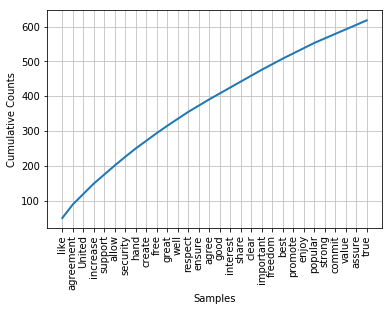

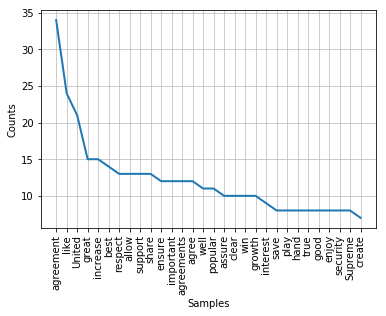

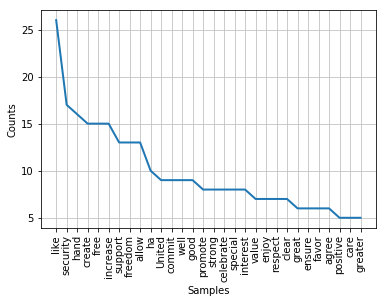

In [51]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Negative words exploration
### Word frequency

In [52]:
print('All text')
freqDist_one = wf.get_word_freq(df['negative_words'], True, topn=10)

print('Real news')

freqDist_two = wf.get_word_freq(df_real['negative_words'], True, topn=10)

print('Fake news')
freqDist_three = wf.get_word_freq(df_fake['negative_words'], True, topn=10)

All text
Number of unique words:  404
Top 10 words:
[('attack', 35), ('prisoners', 25), ('death', 23), ('argue', 21), ('prison', 21), ('suffer', 20), ('stop', 20), ('kill', 19), ('victim', 19), ('avoid', 19)]
Real news
Number of unique words:  256
Top 10 words:
[('attack', 19), ('death', 17), ('risk', 13), ('victim', 13), ('suffer', 12), ('crime', 12), ('accuse', 11), ('argue', 11), ('kill', 11), ('avoid', 10)]
Fake news
Number of unique words:  285
Top 10 words:
[('prisoners', 25), ('attack', 16), ('prison', 14), ('fight', 12), ('violence', 12), ('ban', 12), ('stop', 11), ('fire', 10), ('argue', 10), ('refuse', 10)]


In [53]:
print('Simple similarity: ')

topn = int(len(freqDist_one) * 0.3)
res = wf.pert_of_difference(freqDist_two, freqDist_three, topn)
jacc_sim['neg_words'] = res
res

Simple similarity: 


0.3081081081081081

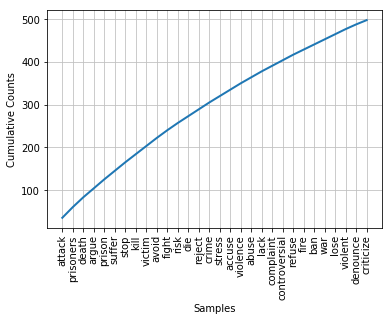

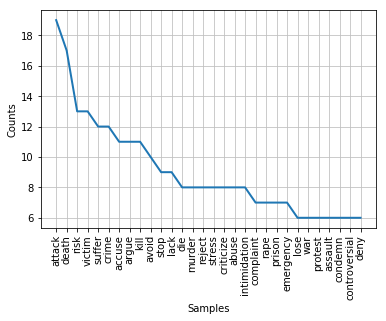

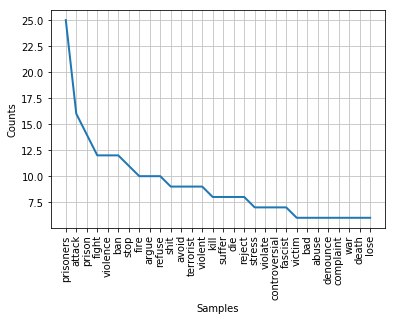

In [54]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Adjective words exploration
### Word frequency

In [55]:

print('All text')
freqDist_one = wf.get_word_freq(df['adjective_words'], True, topn=10)

print('Real news')

freqDist_two = wf.get_word_freq(df_real['adjective_words'], True, topn=10)

print('Fake news')
freqDist_three = wf.get_word_freq(df_fake['adjective_words'], True, topn=10)

All text
Number of unique words:  1695
Top 10 words:
[('last', 53), ('new', 39), ('Spanish', 34), ('public', 29), ('social', 28), ('many', 28), ('first', 27), ('present', 26), ('open', 22), ('several', 21)]
Real news
Number of unique words:  1097
Top 10 words:
[('last', 33), ('new', 25), ('first', 20), ('present', 19), ('open', 15), ('Spanish', 14), ('many', 13), ('social', 12), ('public', 12), ('second', 12)]
Fake news
Number of unique words:  991
Top 10 words:
[('last', 20), ('Spanish', 20), ('public', 17), ('social', 16), ('many', 15), ('several', 14), ('new', 14), ('local', 9), ('free', 9), ('legal', 8)]


In [56]:
print('Simple similarity: ')

topn = int(len(freqDist_one) * 0.3)
res = wf.pert_of_difference(freqDist_two, freqDist_three, topn)
jacc_sim['adj_words'] = res
res

Simple similarity: 


0.23751522533495736

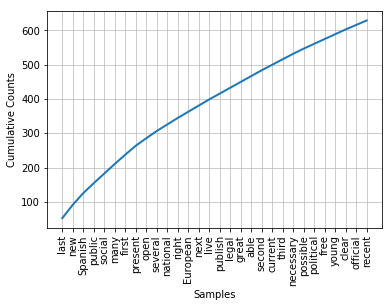

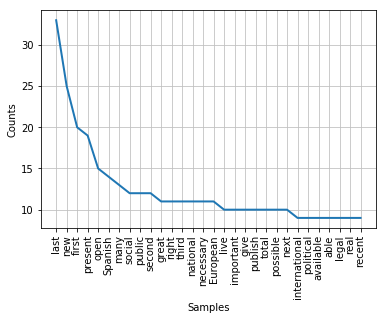

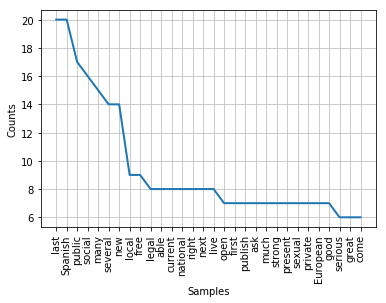

In [57]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

## Verbs words exploration
### Word frequency

In [62]:
print('All text')
freqDist_one = wf.get_word_freq(df['verb_words'], True, topn=10)

print('Real news')

freqDist_two = wf.get_word_freq(df_real['verb_words'], True, topn=10)

print('Fake news')
freqDist_three = wf.get_word_freq(df_fake['verb_words'], True, topn=10)

All text
Number of unique words:  1071
Top 10 words:
[('say', 68), ('make', 56), ('go', 52), ('take', 44), ('come', 38), ('want', 34), ('find', 32), ('give', 31), ('know', 29), ('put', 28)]
Real news
Number of unique words:  693
Top 10 words:
[('say', 37), ('make', 35), ('go', 26), ('take', 23), ('know', 20), ('want', 19), ('find', 18), ('continue', 17), ('come', 16), ('leave', 16)]
Fake news
Number of unique words:  645
Top 10 words:
[('say', 31), ('go', 26), ('come', 22), ('make', 21), ('take', 21), ('give', 17), ('put', 17), ('want', 15), ('find', 14), ('consider', 13)]


In [63]:
print('Simple similarity: ')

topn = int(len(freqDist_one) * 0.3)
res = wf.pert_of_difference(freqDist_two, freqDist_three, topn)
jacc_sim['verb_words'] = res
res

Simple similarity: 


0.3048780487804878

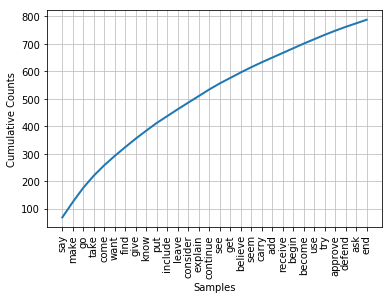

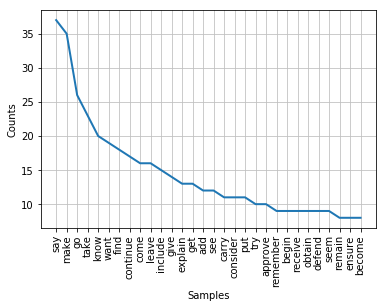

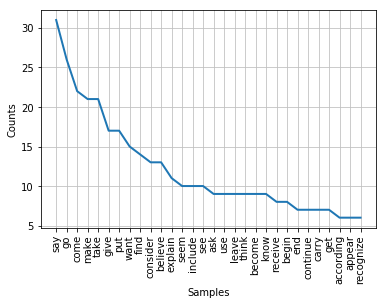

In [64]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

In [67]:
print('All text')
freqDist_one = wf.get_word_freq(df['common_noun_words'], True, topn=10)

print('Real news')

freqDist_two = wf.get_word_freq(df_real['common_noun_words'], True, topn=10)

print('Fake news')
freqDist_three = wf.get_word_freq(df_fake['common_noun_words'], True, topn=10)

All text
Number of unique words:  5503
Top 10 words:
[('time', 52), ('years', 47), ('Spain', 45), ('year', 45), ('people', 39), ('government', 37), ('case', 36), ('country', 36), ('group', 34), ('place', 34)]
Real news
Number of unique words:  3762
Top 10 words:
[('years', 29), ('year', 26), ('time', 24), ('Spain', 22), ('government', 21), ('place', 21), ('people', 19), ('group', 19), ('accord', 18), ('case', 17)]
Fake news
Number of unique words:  3062
Top 10 words:
[('time', 28), ('Spain', 23), ('people', 20), ('case', 19), ('country', 19), ('year', 19), ('years', 18), ('government', 16), ('act', 16), ('man', 15)]


In [68]:
print('Simple similarity: ')

topn = int(len(freqDist_one) * 0.3)
res = wf.pert_of_difference(freqDist_two, freqDist_three, topn)
jacc_sim['common_noun_words'] = res
res

Simple similarity: 


0.24858115777525538

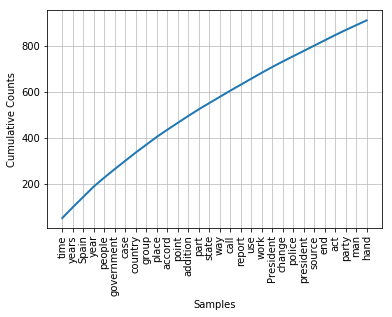

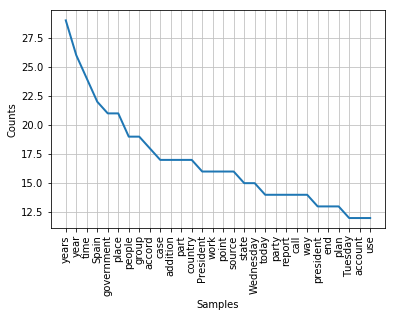

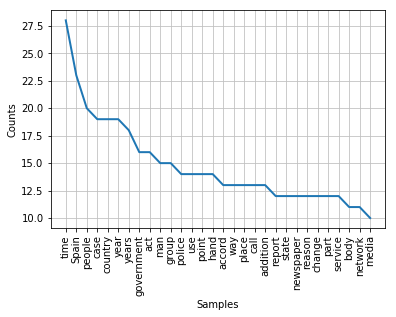

In [69]:
freqDist_one.plot(30,cumulative=True)
freqDist_two.plot(30,cumulative=False)
freqDist_three.plot(30,cumulative=False)

### Conclusion

In [70]:
for key in jacc_sim:
    print(key, jacc_sim[key])

title 0.046357615894039736
text 0.32004830917874394
pos_words 0.391304347826087
neg_words 0.3081081081081081
adj_words 0.23751522533495736
noun_words 0.018167456556082148
verb_words 0.3048780487804878
common_noun_words 0.24858115777525538


Best:
    1. noun_words
    2. adj_words
    3. text
title: OUTLIER